Loads the dataset into the notebook.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np



In [84]:

# Data loading and preprocessing.
# Resizing images to 300 x 300 and splitting into training, validation, and test sets.


# Load training dataset, and set aside 20% for validation.
data_dir = "data/dataset/train"
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=(300, 300),
    batch_size=batch_size
)

# Load test dataset
data_dir = "data/dataset/test" 
batch_size = 32
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=1234,
    image_size=(300, 300),
    batch_size=batch_size
)

Found 5110 files belonging to 11 classes.
Using 4088 files for training.
Found 410 files belonging to 11 classes.


# Ensure that our data has been loaded correctly.
print out 10 images from the dataset.

Class names: ['chair', 'door', 'fence', 'garbage_bin', 'no_hazard', 'obstacle', 'plant', 'pothole', 'slippery_hole', 'stairs', 'table']


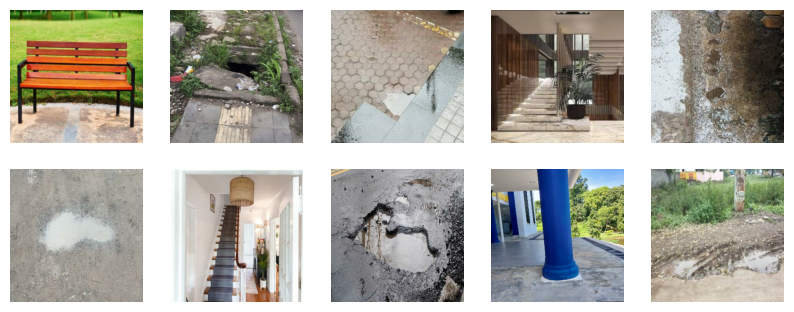

In [85]:
# Verify that the dataset is loaded correctly.
class_names = train_ds.class_names
print("Class names:", class_names)
# Display a few images from the training dataset.
plt.figure(figsize=(10, 10))
# Display 10
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    images, labels = next(iter(train_ds.skip(i).take(1)))
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.axis("off")

# Our Model Architecture:


A convolutional Neural Network that undergoes the following:


Convolution -> Pooling -> Dropout -> Convolution -> Pooling -> Dropout -> Flatten -> Dense

In [97]:
# https://www.tensorflow.org/tutorials/images/cnn

# Define the model architecture.
# Sequential model with convolutional layers, max pooling, and dense layers.
model = models.Sequential([

    layers.Rescaling(1./255, input_shape=(300, 300, 3)),

    # First Layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Second Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    
    # Third Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    # Fourth Layer
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
    
])
print(model.summary())

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_28 (Rescaling)        │ (None, 300, 300, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_92 (Conv2D)              │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_80          │ (None, 149, 149, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_81          │ (None, 73, 73, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 35, 35, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 11)             │         2,827 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,170,635 (65.50 MB)

 Trainable params: 17,169,675 (65.50 MB)

 Non-trainable params: 960 (3.75 KB)

None


# Training the model

In [98]:
# train the model.

# set a custom opitmizer to lower the learning rate of the model.

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
# Train the model with the training dataset and validate with the validation dataset.
epochs = 8
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4798 - loss: 2.4523 - val_accuracy: 0.1049 - val_loss: 7.5017
Epoch 2/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.8586 - loss: 0.4938 - val_accuracy: 0.2098 - val_loss: 7.5943
Epoch 3/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 124s 967ms/step - accuracy: 0.9473 - loss: 0.1518 - val_accuracy: 0.2512 - val_loss: 5.0406
Epoch 4/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.9767 - loss: 0.0698 - val_accuracy: 0.3854 - val_loss: 4.0269
Epoch 5/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 125s 978ms/step - accuracy: 0.9822 - loss: 0.0595 - val_accuracy: 0.6415 - val_loss: 1.8992
Epoch 6/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 126s 984ms/step - accuracy: 0.9870 - loss: 0.0352 - val_accuracy: 0.6171 - val_loss: 2.0024
Epoch 7/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 128s 999ms/step - accuracy: 0.9913 - loss: 0.0297 - val_accuracy: 0.6415 - val_loss: 2.1187
Epoch 8/8
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9900 - loss: 0.0328 - val_

# Plot Training Accuracy and Validation Accuracy Values

A higher training accuracy means the model scores better on correctly classifying images. 
A lower loss means the model scores better on avoiding mistakes when classifying images.

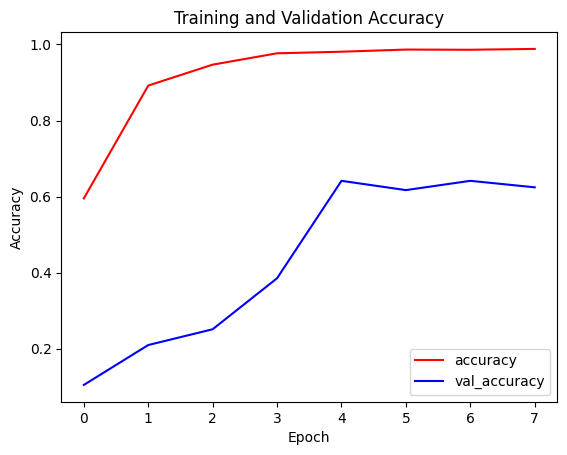

In [99]:
# Accuracy Values
plt.plot(history.history['accuracy'], label='accuracy',c='r')
plt.plot(history.history['val_accuracy'], label='val_accuracy',c='b')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

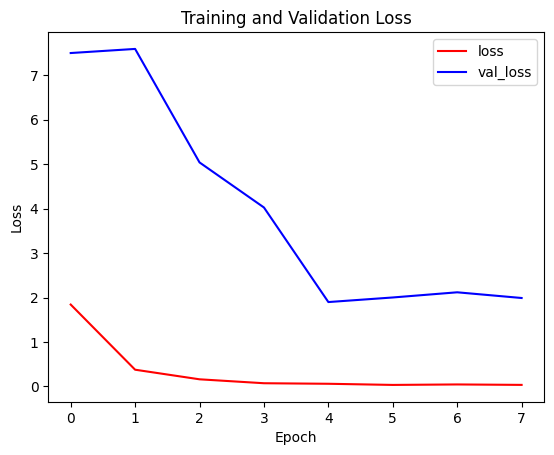

In [100]:
#Loss Values
plt.plot(history.history['loss'], label='loss',c='r')
plt.plot(history.history['val_loss'], label='val_loss', c='b')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [90]:
# save the model.
model.save('model.keras')

# Testing the model

In [72]:
# load the model.
loaded_model = tf.keras.models.load_model('model.keras')
# Evaluate the model on the test dataset.
test_loss, test_acc = loaded_model.evaluate(test_ds)
print("Test accuracy:", test_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - accuracy: 0.6524 - loss: 1.5907
Test accuracy: 0.6766917109489441


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


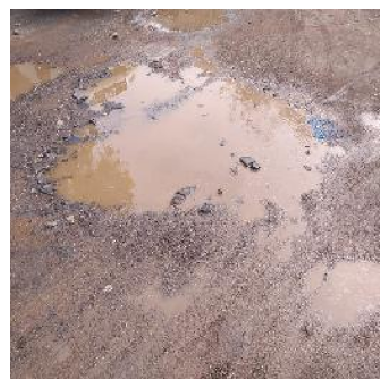

Predicted class: slippery_hole with confidence 1.00


In [92]:
# Testing the model with a single image.

# Before doing so, ensure that the image is preprocessed correctly.

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array

def show_image(img_path):
    img = image.load_img(img_path, target_size=(300, 300))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Predict the class of the image, and display the image along with the predicted class and confidence score.
image_path = "data/dataset/train/slippery_hole/image42.jpeg"
model_input = load_and_preprocess_image(img_path=image_path)
predictions = loaded_model.predict(model_input)
predicted_class = np.argmax(predictions[0])
show_image(image_path)
print(f"Predicted class: {class_names[predicted_class]} with confidence {predictions[0][predicted_class]:.2f}")

In [ ]:
# To be integrated into a web application.

if (class_names[predicted_class] == "no_hazard"):
    print("No hazard detected.")
else:
    print(f"There is a hazard detected in front of you. Please be careful as there is a {str(class_names[predicted_class]).replace('_',' ')} near you.")

# Within a web application, you can use the model to predict the class of an uploaded image and display the result to the user.
# The API should be run once every few seconds.

There is a hazard detected in front of you. Please be careful as there is a slippery hole near you.
